In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4f}'.format
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [51]:
data = pd.read_csv(r"D:\New folder (2)\TravelInsurancePrediction.csv")

In [52]:
data

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [54]:
data.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.0000,1987.0000,1987.0000,1987.0000,1987.0000,1987.0000
mean,993.0000,29.6502,932762.9592,4.7529,0.2778,0.3573
std,573.7418,2.9133,376855.6847,1.6096,0.4480,0.4793
min,0.0000,25.0000,300000.0000,2.0000,0.0000,0.0000
25%,496.5000,28.0000,600000.0000,4.0000,0.0000,0.0000
50%,993.0000,29.0000,900000.0000,5.0000,0.0000,0.0000
75%,1489.5000,32.0000,1250000.0000,6.0000,1.0000,1.0000
max,1986.0000,35.0000,1800000.0000,9.0000,1.0000,1.0000


In [55]:
data.drop('Unnamed: 0',axis=1,inplace=True)

## Data preprocessing

In [56]:
for i in data.columns:
    print("Uniqe values in",i,"is",data[i].unique())

Uniqe values in Age is [31 34 28 25 33 26 32 29 35 30 27]
Uniqe values in Employment Type is ['Government Sector' 'Private Sector/Self Employed']
Uniqe values in GraduateOrNot is ['Yes' 'No']
Uniqe values in AnnualIncome is [ 400000 1250000  500000  700000 1150000 1300000 1350000 1450000  800000
 1400000  850000 1500000 1050000  350000 1100000  600000  900000  550000
  300000  750000 1200000 1000000  950000 1700000 1750000  650000  450000
 1650000 1800000 1550000]
Uniqe values in FamilyMembers is [6 7 4 3 8 9 5 2]
Uniqe values in ChronicDiseases is [1 0]
Uniqe values in FrequentFlyer is ['No' 'Yes']
Uniqe values in EverTravelledAbroad is ['No' 'Yes']
Uniqe values in TravelInsurance is [0 1]


## Univariate analysis

<Axes: xlabel='Age', ylabel='count'>

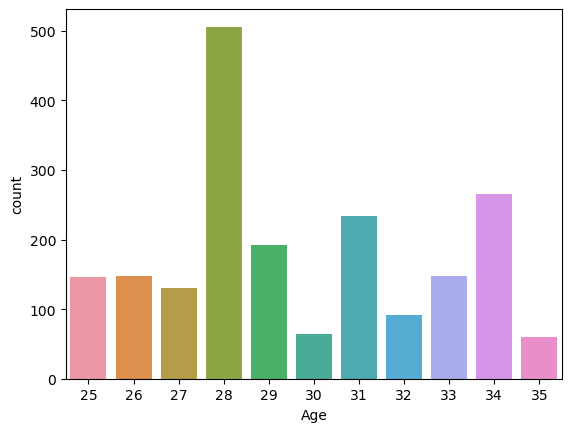

In [57]:
sns.countplot(x='Age',data=data)

<Axes: xlabel='Age'>

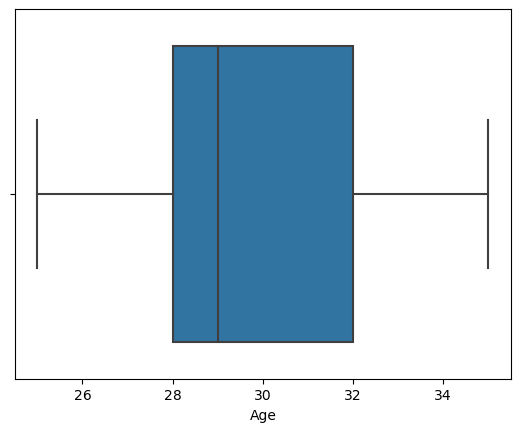

In [58]:
sns.boxplot(x='Age',data = data)

<Axes: xlabel='Age', ylabel='Density'>

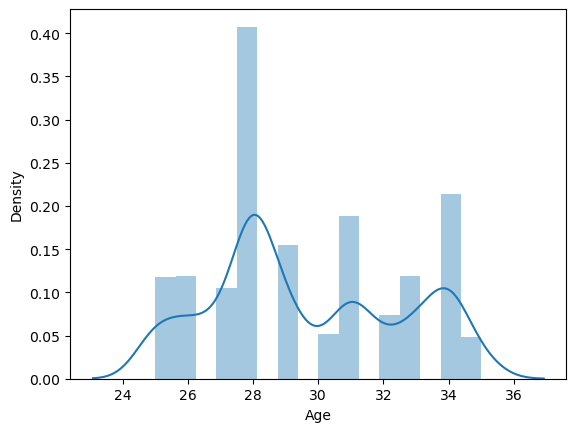

In [59]:
sns.distplot(data.Age)

<Axes: xlabel='Employment Type', ylabel='count'>

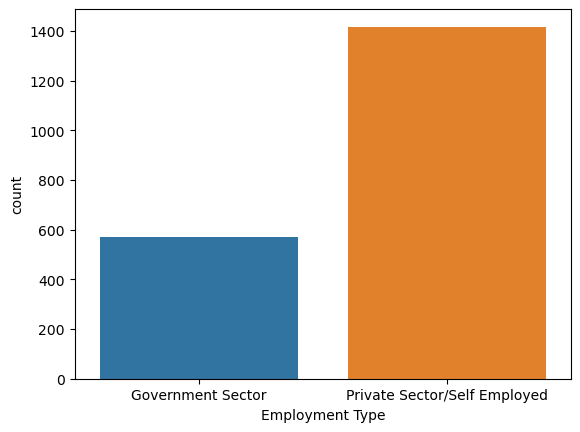

In [60]:
sns.countplot(x='Employment Type',data=data, label='Count')

<Axes: xlabel='GraduateOrNot', ylabel='count'>

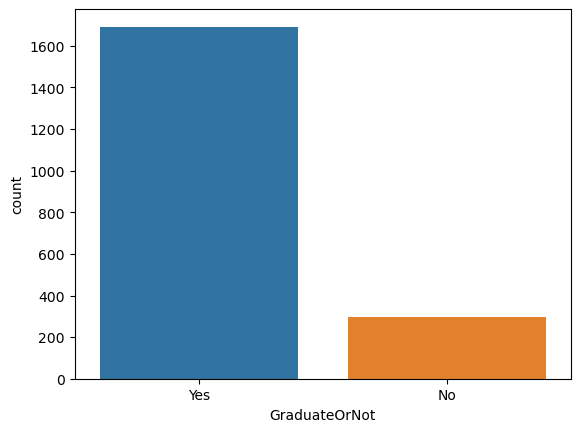

In [61]:
sns.countplot(x='GraduateOrNot',data=data)

<Axes: xlabel='FamilyMembers', ylabel='count'>

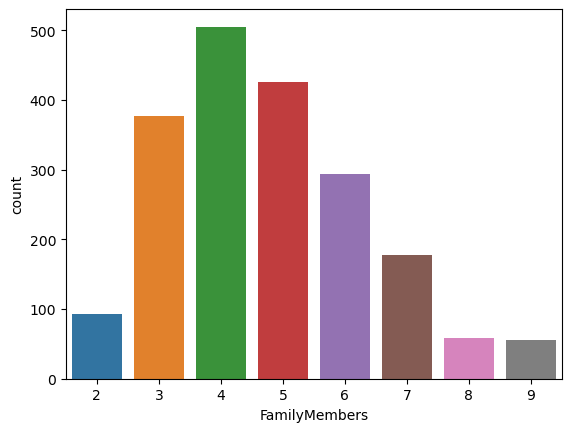

In [62]:
sns.countplot(x='FamilyMembers',data=data)

<Axes: xlabel='FamilyMembers', ylabel='Density'>

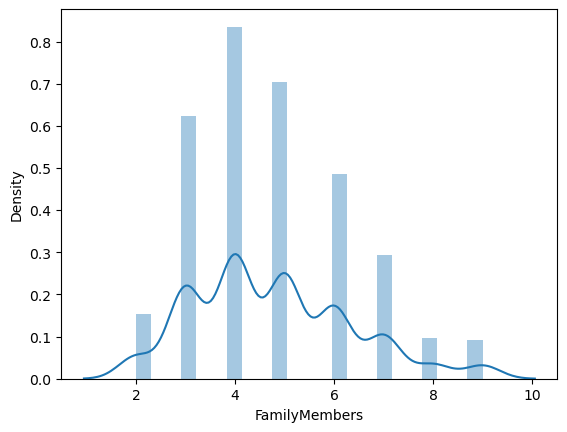

In [63]:
sns.distplot(data.FamilyMembers)

<Axes: xlabel='ChronicDiseases', ylabel='count'>

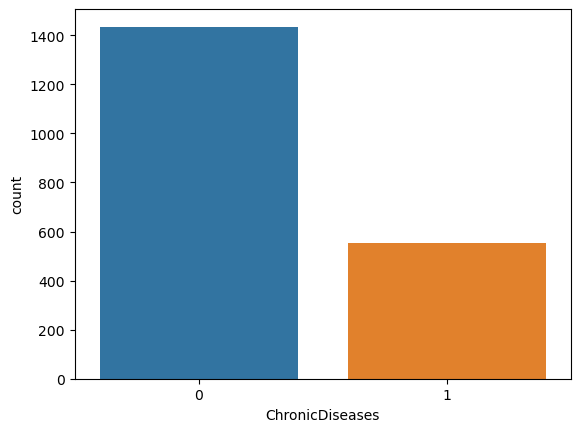

In [64]:
sns.countplot(x='ChronicDiseases',data=data)

<Axes: xlabel='EverTravelledAbroad', ylabel='count'>

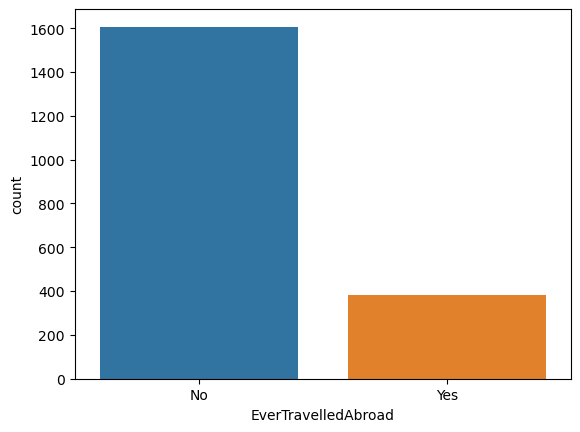

In [65]:
sns.countplot(x='EverTravelledAbroad',data=data)

<Axes: xlabel='FrequentFlyer', ylabel='count'>

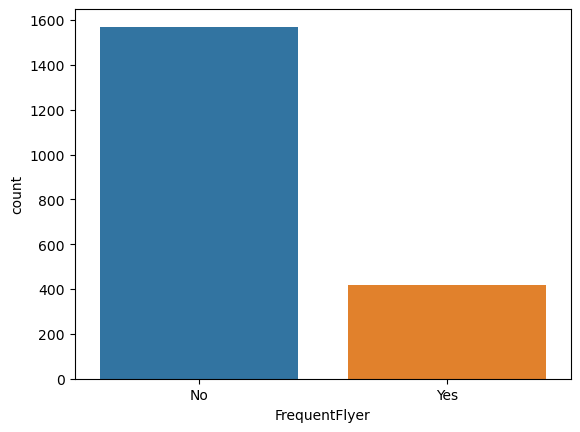

In [66]:
sns.countplot(x='FrequentFlyer',data=data)

<Axes: xlabel='TravelInsurance', ylabel='count'>

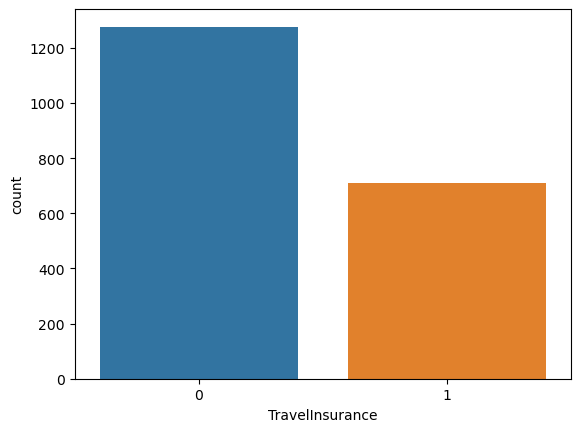

In [67]:
sns.countplot(x='TravelInsurance',data=data)

## Bivariate analysis

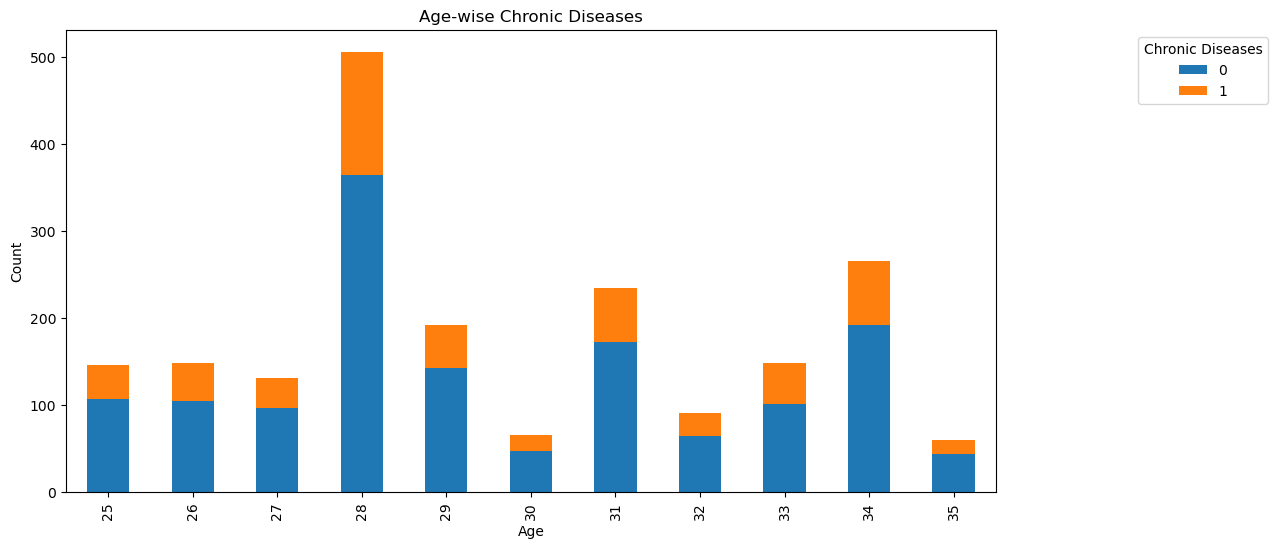

In [68]:
age_ChronicDeseases_counts = data.groupby(['Age', 'ChronicDiseases']).size().unstack(fill_value=0)

# Plot the data
age_ChronicDeseases_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Age-wise Chronic Diseases')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Chronic Diseases', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

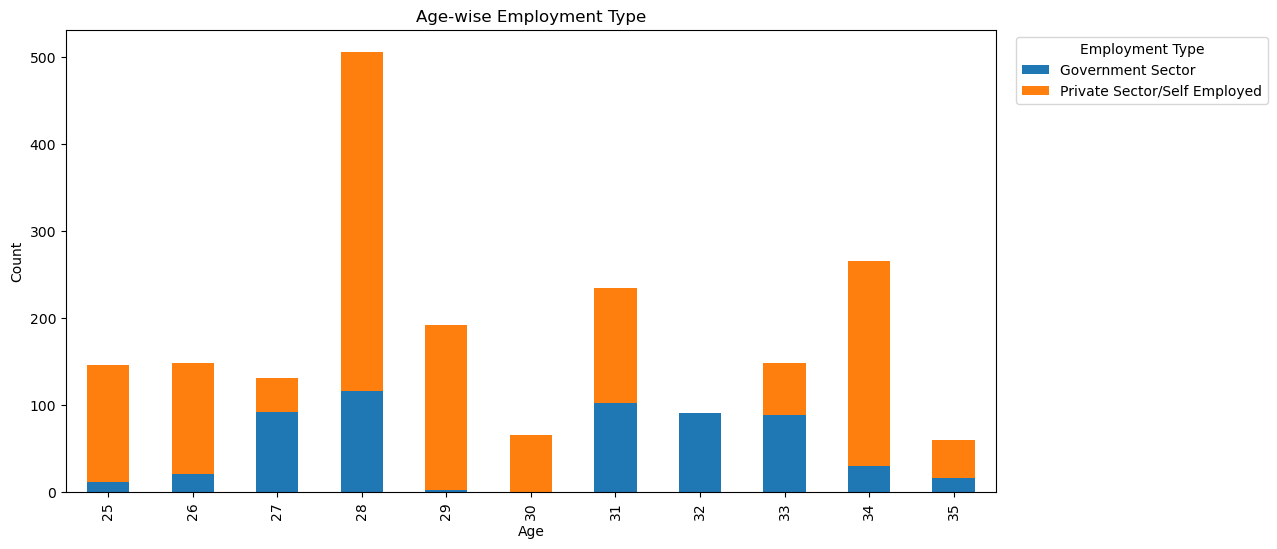

In [69]:
age_employment_counts = data.groupby(['Age', 'Employment Type']).size().unstack(fill_value=0)

# Plot the data
age_employment_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Age-wise Employment Type')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Employment Type', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

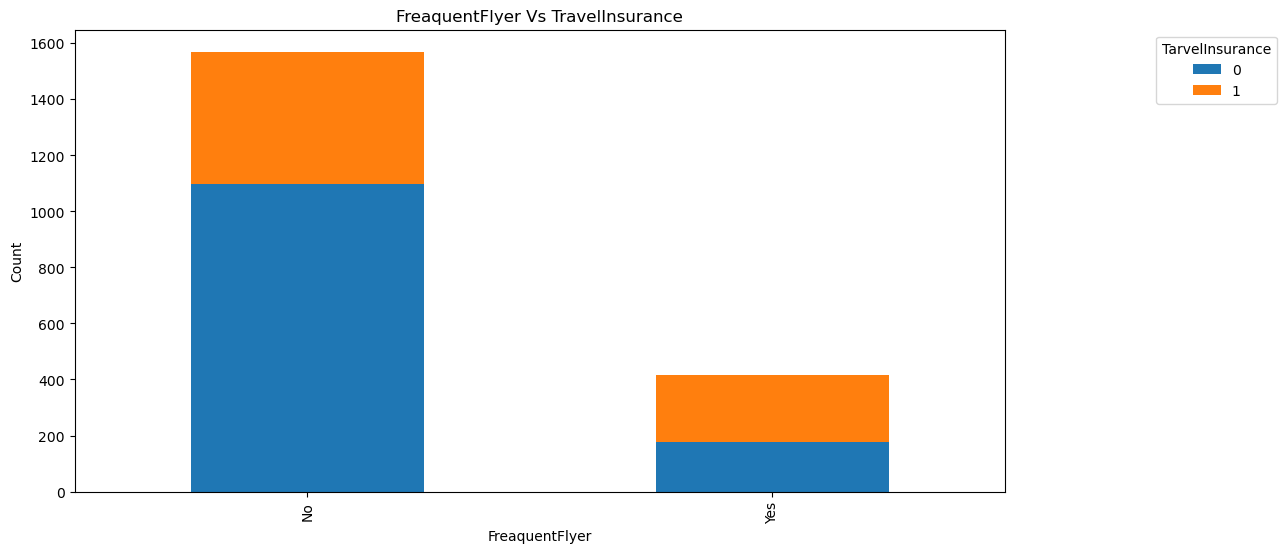

In [70]:
FrequentFlyer_Insurance_counts = data.groupby(['FrequentFlyer', 'TravelInsurance']).size().unstack(fill_value=0)

# Plot the data
FrequentFlyer_Insurance_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('FreaquentFlyer Vs TravelInsurance')
plt.xlabel('FreaquentFlyer')
plt.ylabel('Count')
plt.legend(title='TarvelInsurance', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

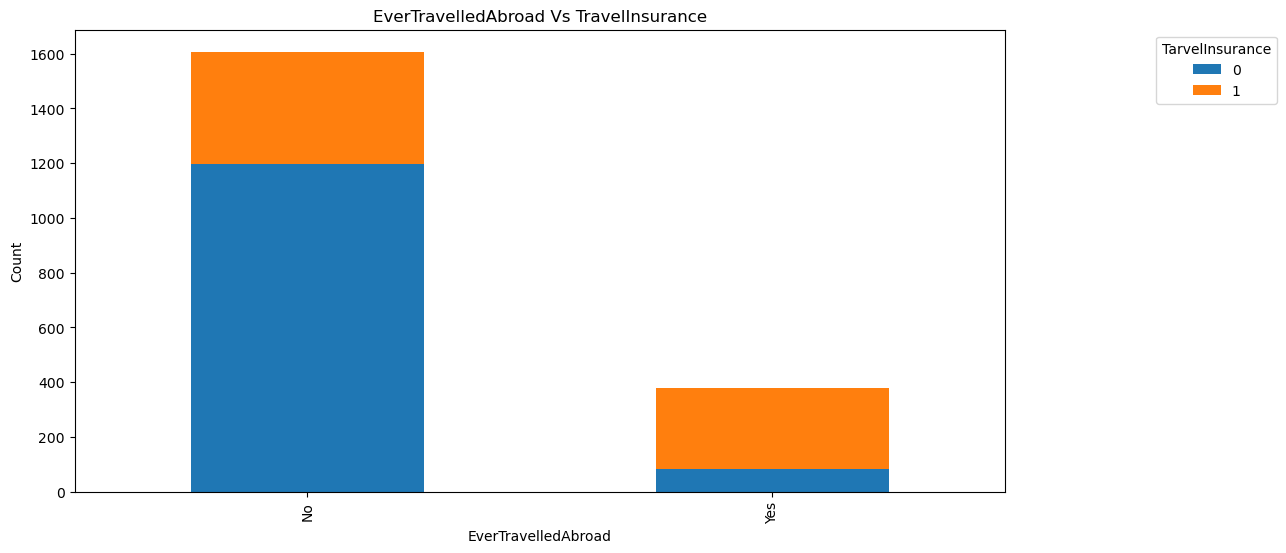

In [71]:
EverTravelledAbroad_TravelInsurance_counts = data.groupby(['EverTravelledAbroad', 'TravelInsurance']).size().unstack(fill_value=0)

# Plot the data
EverTravelledAbroad_TravelInsurance_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('EverTravelledAbroad Vs TravelInsurance')
plt.xlabel('EverTravelledAbroad')
plt.ylabel('Count')
plt.legend(title='TarvelInsurance', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

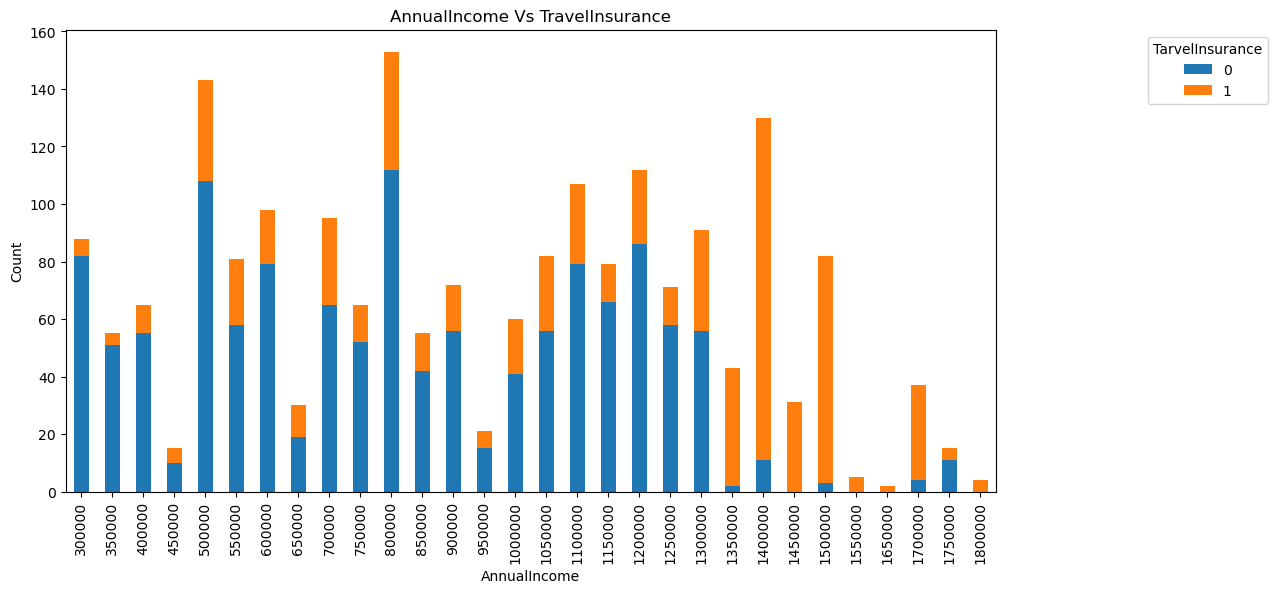

In [72]:
annualIncome_TravelInsurance_counts = data.groupby(['AnnualIncome', 'TravelInsurance']).size().unstack(fill_value=0)

# Plot the data
annualIncome_TravelInsurance_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('AnnualIncome Vs TravelInsurance')
plt.xlabel('AnnualIncome')
plt.ylabel('Count')
plt.legend(title='TarvelInsurance', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

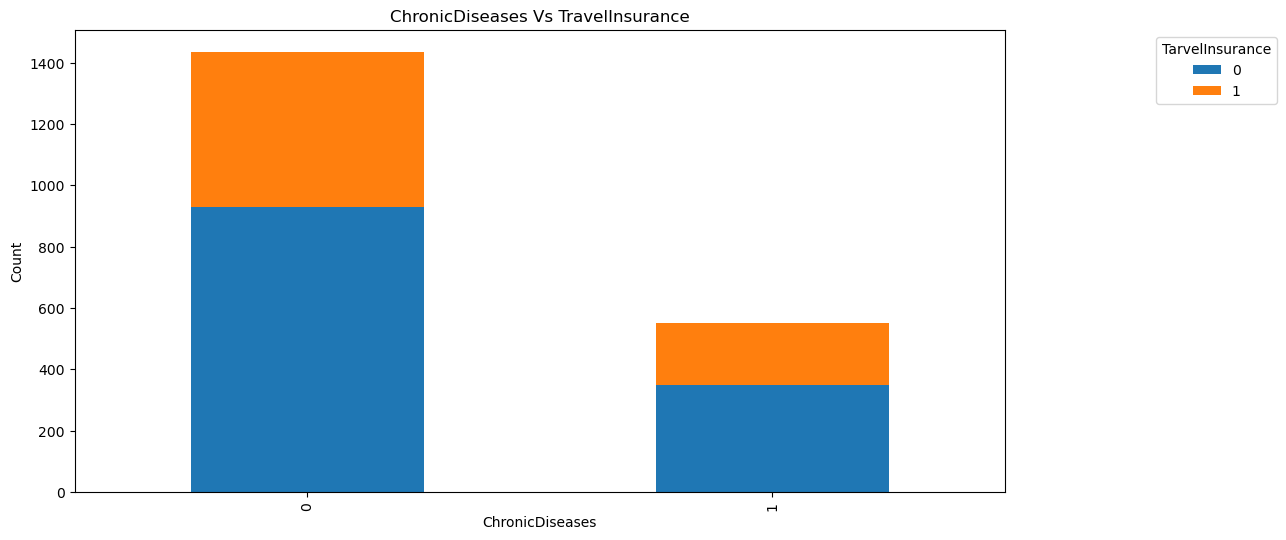

In [73]:
ChronicDiseases_TravelInsurance_counts = data.groupby(['ChronicDiseases', 'TravelInsurance']).size().unstack(fill_value=0)

# Plot the data
ChronicDiseases_TravelInsurance_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('ChronicDiseases Vs TravelInsurance')
plt.xlabel('ChronicDiseases')
plt.ylabel('Count')
plt.legend(title='TarvelInsurance', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

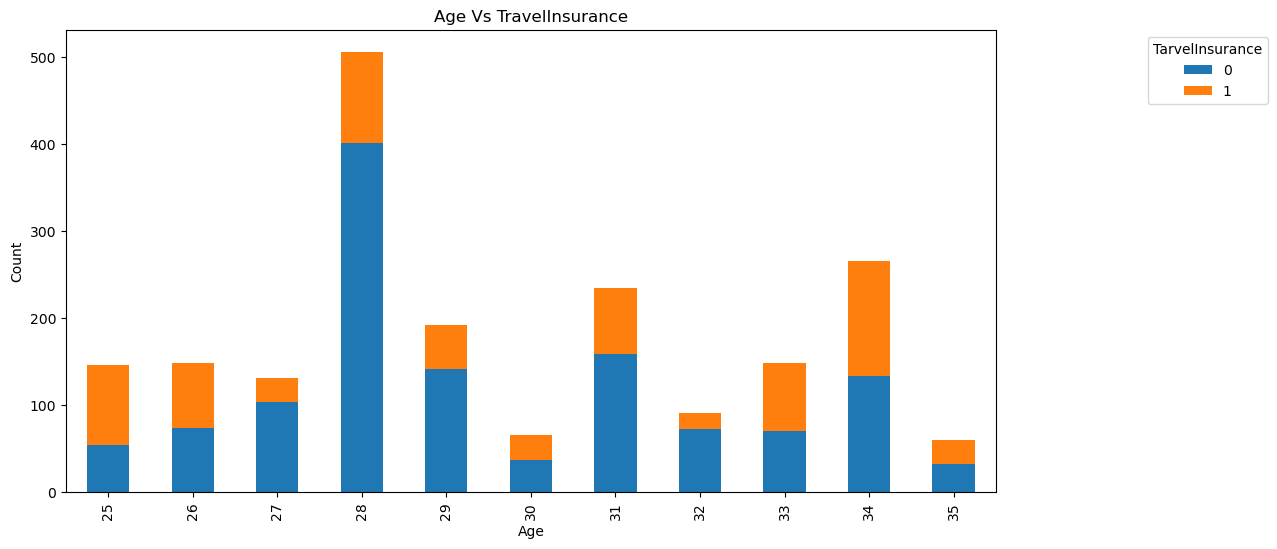

In [74]:
age_TravelInsurance_counts = data.groupby(['Age', 'TravelInsurance']).size().unstack(fill_value=0)

# Plot the data
age_TravelInsurance_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Age Vs TravelInsurance')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='TarvelInsurance', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

<Axes: >

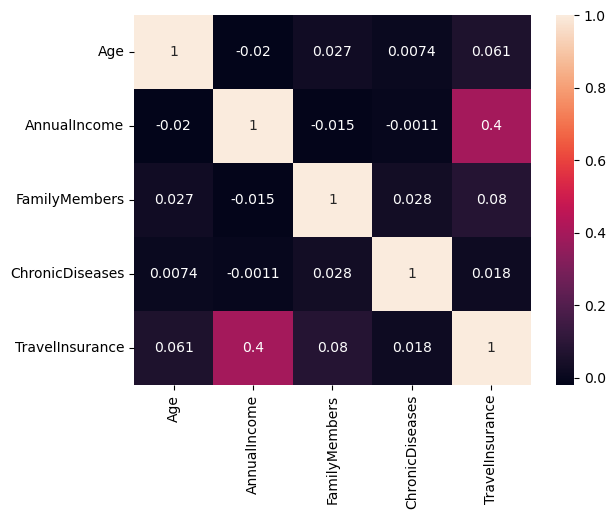

In [75]:
sns.heatmap(data.corr(),annot=True)

In [76]:
data['Employment Type'] = data['Employment Type'].map({'Government Sector':0,'Private Sector/Self Employed':1})
data['GraduateOrNot'] = data['GraduateOrNot'].map({'No':0,'Yes':1})

In [77]:
data['FrequentFlyer'] = data['FrequentFlyer'].map({'No':0,'Yes':1})
data['EverTravelledAbroad'] = data['EverTravelledAbroad'].map({'No':0,'Yes':1})

In [78]:
x = data.drop('TravelInsurance',axis=1)
y = data['TravelInsurance']

In [81]:
standard = StandardScaler()
x = standard.fit_transform(x_smote)

In [82]:
train_x,test_x,train_y,test_y = train_test_split(x,y_smote,test_size=0.2)

In [83]:
dc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=100)
svc = SVC()

In [95]:
dc.fit(train_x,train_y)

DecisionTreeClassifier()

In [96]:
dc.score(train_x,train_y)

0.920075519194462

In [97]:
result = dc.predict(test_x)
print(confusion_matrix(test_y,result))
print(classification_report(test_y,result))

[[216  41]
 [ 50  91]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       257
           1       0.69      0.65      0.67       141

    accuracy                           0.77       398
   macro avg       0.75      0.74      0.75       398
weighted avg       0.77      0.77      0.77       398



In [79]:
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x,y)

In [80]:
train_x,test_x,train_y,test_y = train_test_split(x_smote,y_smote,test_size=0.2)

In [105]:
dc.fit(train_x,train_y)
result = dc.predict(test_x)
print(dc.score(train_x,train_y))
print(dc.score(test_x,test_y))
print(classification_report(test_y,result))

0.9393049437102301
0.7808219178082192
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       254
           1       0.82      0.73      0.77       257

    accuracy                           0.78       511
   macro avg       0.78      0.78      0.78       511
weighted avg       0.78      0.78      0.78       511



In [84]:
rfc.fit(train_x,train_y)

RandomForestClassifier()

In [85]:
rfc.score(train_x,train_y)

0.9182574645129711

In [86]:
result = rfc.predict(test_x)

In [87]:
print(classification_report(test_y,result))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       248
           1       0.79      0.75      0.77       263

    accuracy                           0.77       511
   macro avg       0.77      0.77      0.77       511
weighted avg       0.77      0.77      0.77       511



In [88]:

param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9, 20, 30, 50], 
    'max_leaf_nodes': [3, 6, 9, 20, 30, 50], 
} 

In [89]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(train_x, train_y) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=50,
                       n_estimators=150)


In [90]:

model_random = RandomForestClassifier(max_depth=9, 
                                      max_features= 'log2', 
                                      max_leaf_nodes=50, 
                                      n_estimators=150) 
model_random.fit(train_x, train_y) 
y_pred_rand = model_random.predict(test_x) 
print(classification_report(y_pred_rand, test_y)) 

              precision    recall  f1-score   support

           0       0.92      0.70      0.80       322
           1       0.64      0.89      0.74       189

    accuracy                           0.77       511
   macro avg       0.78      0.80      0.77       511
weighted avg       0.81      0.77      0.78       511



In [147]:
ss = standard.transform(np.array([data1]))

In [130]:
data1 = pd.DataFrame(data1)

In [148]:
rfc.predict(ss)

array([1], dtype=int64)

In [91]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(rfc, f)